
# **Car Price prediction**
### **Team Members**
##### **Abdul Hanan Mohil**  ***BCSF20A549***
##### **Adeel Ahmad**  ***BCSF20A533***
- First step was to collect the data
- I scrapped pakwheels.com and gathered around 58,000 entries. As, I didn't found any good dataset on kaggle
- Then, loaded the data in pandas dataFrame.
- Removed the attributes that were not useful like the Link, Ad No, Last Updated, Features and Location
- Removed the rows that have a missing value
- Used Label Encode to Encode the categorical data
- Trained different regression models to view the difference and picked up the best one


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading and cleaning the csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib


# Read data from file 'pakWheels.csv'
data = pd.read_csv('/content/drive/MyDrive/Car_Price_Prediction/pakWheels.csv')
data.head()



,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL
0,7472110,Chevrolet Joy 1.0 2008,975000.0,2008,"I-10, Islamabad Islamabad",144800,Islamabad,Petrol,1000 cc,Manual,Gold,Imported,Hatchback,"AM/FM Radio, CD Player, Cassette Player, Keyl...","Jun 25, 2023",https://www.pakwheels.com/used-cars/chevrolet-...
1,7597614,Toyota Corolla GLi 1.3 VVTi 2016,3375000.0,2016,"Shorkot, Shorkot Punjab",122000,Lahore,Petrol,1300 cc,Manual,White,Local,Sedan,"AM/FM Radio, Air Conditioning, CD Player, DVD...","Jun 25, 2023",https://www.pakwheels.com/used-cars/toyota-cor...
2,7280186,Honda BR-V i-VTEC S 2018,4800000.0,2018,"NFC 1, Lahore Punjab",18731,Lahore,Petrol,1500 cc,Automatic,Crystal Black Pearl,Local,MPV,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jun 25, 2023",https://www.pakwheels.com/used-cars/honda-br-v...
3,7319452,Suzuki Mehran VX 2010,680000.0,2010,"Pak Arab Housing Society, Lahore Punjab",76316,Bahawalpur,Petrol,800 cc,Manual,Blue,Local,Hatchback,Front Speakers,"Jun 25, 2023",https://www.pakwheels.com/used-cars/suzuki-meh...
4,7352581,MG HS 1.5 Turbo 2022,8000000.0,2022,"DHA Defence, Lahore Punjab",16950,Punjab,Petrol,1490 cc,Automatic,Black,Local,Crossover,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jun 25, 2023",https://www.pakwheels.com/used-cars/mg-hs-2022...


In [ ]:
# Size of dataset

data.shape

(57783, 16)

## **Data Cleaning**

In [ ]:
# Check for any missing values

data.isna().sum()   # This show the number of missing values for each attribute

Ad No                 0
Name                  0
Price                 0
Model Year            0
Location              0
Mileage               0
Registered City       0
Engine Type         502
Engine Capacity      86
Transmission          0
Color                 0
Assembly              0
Body Type          5583
Features           3413
Last Updated          0
URL                   0
dtype: int64

In [ ]:
# Remove missing values
data = data.dropna(axis=0)

In [ ]:
# All the missing values are now removed

data.isna().sum()

Ad No              0
Name               0
Price              0
Model Year         0
Location           0
Mileage            0
Registered City    0
Engine Type        0
Engine Capacity    0
Transmission       0
Color              0
Assembly           0
Body Type          0
Features           0
Last Updated       0
URL                0
dtype: int64

In [ ]:
# Size after removing missing values

data.shape

(50259, 16)

In [ ]:
# Cleaning the data

# Remove Ad No, URL and Last Updated columns from the dataset
data.drop('Ad No', axis=1, inplace=True)
data.drop('URL', axis=1, inplace=True)
data.drop('Last Updated', axis=1, inplace=True)
data.drop('Location', axis=1, inplace=True)
data.drop('Features', axis=1, inplace=True)

# Convert 'Price' column to numeric values
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')   # errors='coerce' will replace any non-numeric values with NaN
# In Price at some places there was Call for price so that will be converted into NaN after that i will drop those rows

data = data.dropna(subset=['Price'], axis=0)    # Drop any rows with NaN values in the 'Price' column
data = data.dropna(subset=['Engine Type'], axis=0)
data = data.dropna(subset=['Engine Capacity'], axis=0)
data = data.dropna(subset=['Body Type'], axis=0)


# Convert names from Panda Series into a new list
names = data['Name']
names_list = names.tolist()
#print(type(names_list))

# Assigning two new lists to store company and model names
company_list = []
model_list = []
for name in names_list:
    # Create a separate list for company and model
     company_list.append(name.split()[0])
     model_list.append(name.split()[1]+' '+name.split()[2])  # Suppose if the model name consist of two words

# Append model and company
data.insert(0, 'Company', company_list)
data.insert(1, 'Model', model_list)

# Remove CC from the end of engine capacity and convert it into numeric
data['Engine Capacity'] = data['Engine Capacity'].str.replace('cc', '')
data['Engine Capacity'] = pd.to_numeric(data['Engine Capacity'], errors='coerce')   # errors='coerce' will replace any non-numeric values with NaN



data.drop('Name', axis=1, inplace=True)
data['Price'] = data['Price']


<ipython-input-178-6629d84efd08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Ad No', axis=1, inplace=True)
<ipython-input-178-6629d84efd08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('URL', axis=1, inplace=True)
<ipython-input-178-6629d84efd08>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Last Updated', axis=1, inplace=True)
<ipython-input-178-6629d84efd08>:7: SettingWithCopyWarning: 
A va

In [ ]:
# View the cleaned data for understanding purpose

data.head()

,Company,Model,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type
0,Chevrolet,Joy 1.0,975000.00,2008,144800,Islamabad,Petrol,1000,Manual,Gold,Imported,Hatchback
1,Toyota,Corolla GLi,3375000.00,2016,122000,Lahore,Petrol,1300,Manual,White,Local,Sedan
2,Honda,BR-V i-VTEC,4800000.00,2018,18731,Lahore,Petrol,1500,Automatic,Crystal Black Pearl,Local,MPV
3,Suzuki,Mehran VX,680000.00,2010,76316,Bahawalpur,Petrol,800,Manual,Blue,Local,Hatchback
4,MG,HS 1.5,8000000.00,2022,16950,Punjab,Petrol,1490,Automatic,Black,Local,Crossover


In [ ]:
data.shape

(49778, 12)

In [ ]:
# Store the cleaned data in a new .csv

data.to_csv('cleanData.csv', sep=',')




## Data Exploration


### Exporing the price distribution

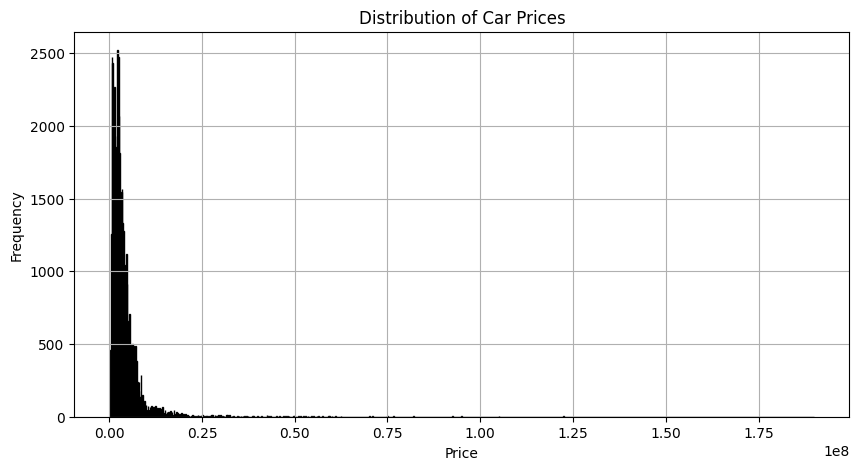

In [ ]:
# Make graph of price distribution in order to spot outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(data['Price'], bins=1000, color='skyblue', edgecolor='black')  # increased bins to make ther with lower frequencies more clear
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.grid(True)
plt.show()

In [ ]:
data['Price'].nlargest(5)

11861   190000000.00
28677   185000000.00
4925    162500000.00
33657   125000000.00
881     122500000.00
Name: Price, dtype: float64

In [ ]:
# Here, the outliers are situated around the higher prices (right side of the graph)
# We can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# This is a dataset about used cars, therefore one can imagine how 19 Crore is an excessive price

# Let's declare a variable that will be equal to the 99.5th percentile of the 'Price' variable
q = data['Price'].quantile(0.995)


# Then we can create a new dataFrame, with the condition that all prices must be below the 99.5 percentile of 'Price'
cleaned_data = data[data['Price']<q]

In [ ]:
cleaned_data['Price'].nlargest(5)

1927    31000000.00
3860    31000000.00
13782   31000000.00
15186   31000000.00
26836   31000000.00
Name: Price, dtype: float64

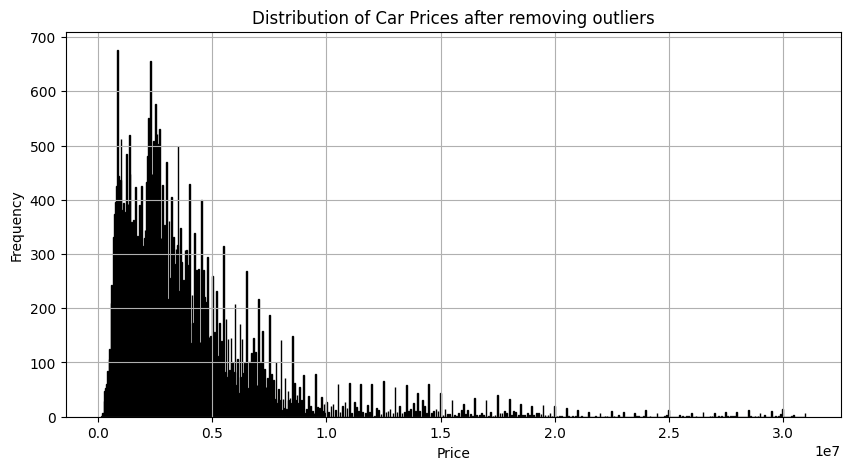

In [ ]:
# Checking the prices again after removing outliers

plt.figure(figsize=(10, 5))
plt.hist(cleaned_data['Price'], bins=1000, color='skyblue', edgecolor='black')  # increased bins to make ther with lower frequencies more clear
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices after removing outliers')
plt.grid(True)
plt.show()

- Now there are much fewer outliers

In [ ]:
# Reseting the index of the data frame after removing the outliers
cleaned_data = cleaned_data.reset_index(drop=True)

# Once again checking discriptive statistics
cleaned_data.describe()

,Price,Model Year,Mileage,Engine Capacity
count,49529.00,49529.00,49529.00,49529.00
mean,3600247.29,2013.75,86580.77,1368.50
std,3235952.09,7.09,79982.38,601.59
min,109000.00,1990.00,1.00,0.00
25%,1585000.00,2009.00,33500.00,1000.00
50%,2725000.00,2016.00,75000.00,1300.00
75%,4500000.00,2020.00,118000.00,1600.00
max,31000000.00,2022.00,1000000.00,12000.00


### Checking the linearity of data




Text(0.5, 1.0, 'Price and Engine Capacity')

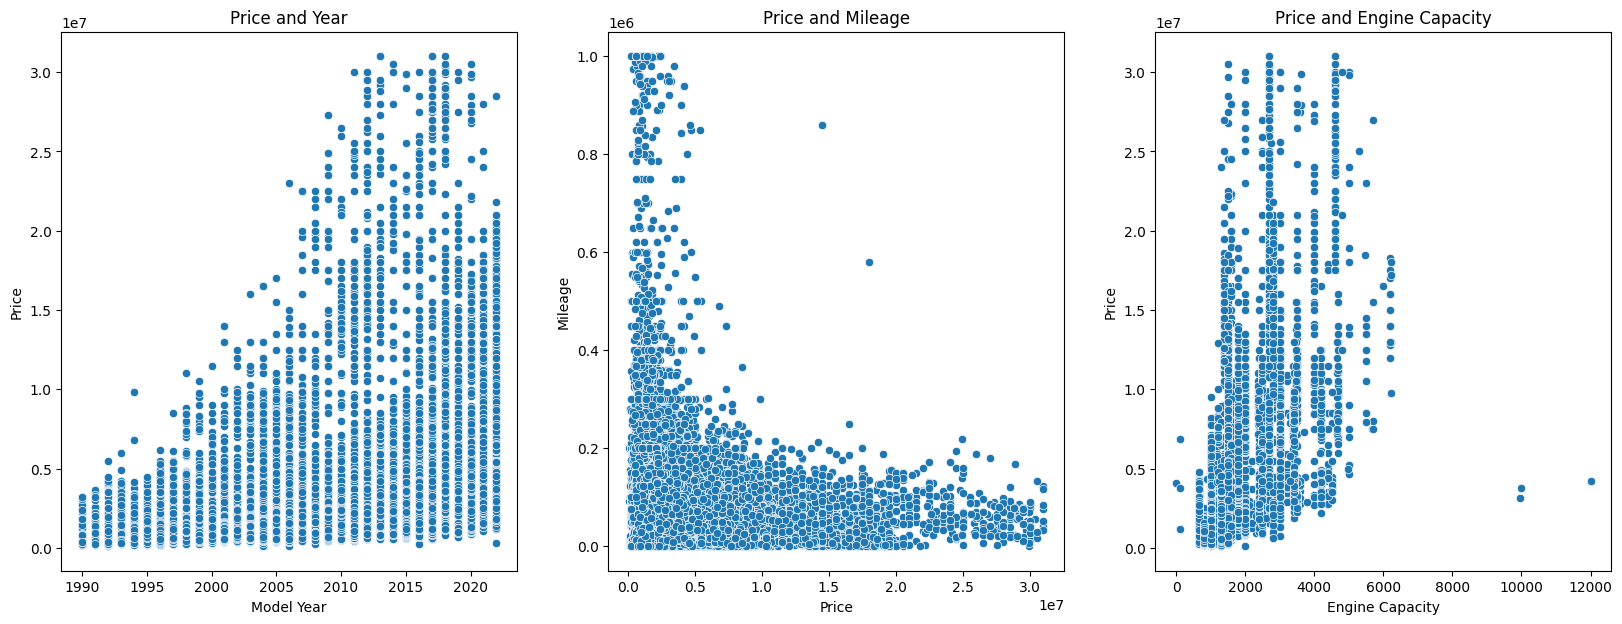

In [ ]:
#Scatter Plot of independent variables vs dependent variables

import seaborn as sns

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='Model Year',y='Price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(x='Price',y='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='Price',x='Engine Capacity',data=cleaned_data)
plt.title("Price and Engine Capacity")

Patterns can be spoted but definitely not perfect linear one. So using logarithmic scaling to improve linearity

In [ ]:
# Transforming 'Price' with a log transformation
log_price = np.log(cleaned_data['Price'])

# Then we add it to our data frame
cleaned_data['log_price'] = log_price
cleaned_data.head()

,Company,Model,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,log_price
0,Chevrolet,Joy 1.0,975000.00,2008,144800,Islamabad,Petrol,1000,Manual,Gold,Imported,Hatchback,13.79
1,Toyota,Corolla GLi,3375000.00,2016,122000,Lahore,Petrol,1300,Manual,White,Local,Sedan,15.03
2,Honda,BR-V i-VTEC,4800000.00,2018,18731,Lahore,Petrol,1500,Automatic,Crystal Black Pearl,Local,MPV,15.38
3,Suzuki,Mehran VX,680000.00,2010,76316,Bahawalpur,Petrol,800,Manual,Blue,Local,Hatchback,13.43
4,MG,HS 1.5,8000000.00,2022,16950,Punjab,Petrol,1490,Automatic,Black,Local,Crossover,15.89


Text(0.5, 1.0, 'Price and Engine Capacity')

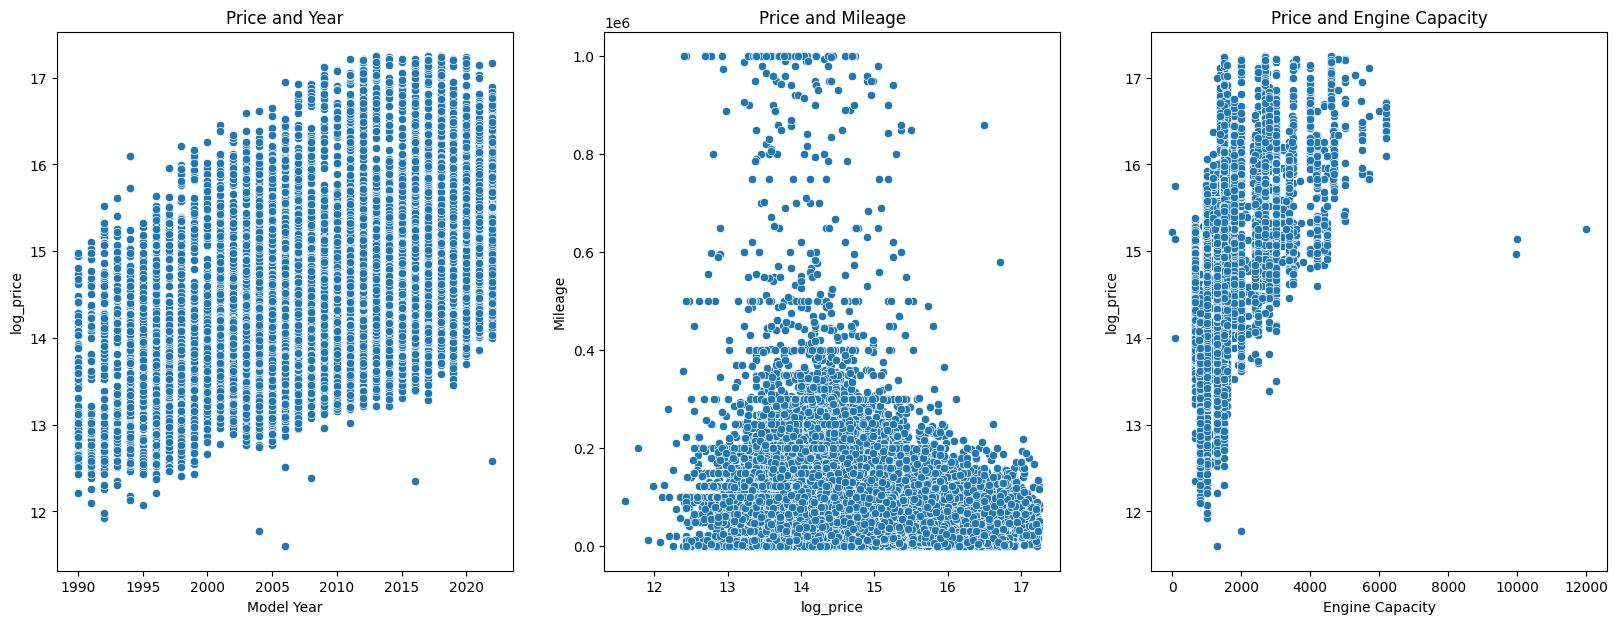

In [ ]:
#Scatter Plot of independent variables vs dependent variables after scalling

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='Model Year',y='log_price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(x='log_price',y='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='log_price',x='Engine Capacity',data=cleaned_data)
plt.title("Price and Engine Capacity")

In [ ]:
# Since we will be using the log price variable, we can drop the old 'Price' one an rename the log_price as 'Price'

cleaned_data = cleaned_data.drop(['Price'],axis=1)
cleaned_data.rename(columns={'log_price': 'Price'}, inplace=True)

In [ ]:
cleaned_data.head()

,Company,Model,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Price
0,Chevrolet,Joy 1.0,2008,144800,Islamabad,Petrol,1000,Manual,Gold,Imported,Hatchback,13.79
1,Toyota,Corolla GLi,2016,122000,Lahore,Petrol,1300,Manual,White,Local,Sedan,15.03
2,Honda,BR-V i-VTEC,2018,18731,Lahore,Petrol,1500,Automatic,Crystal Black Pearl,Local,MPV,15.38
3,Suzuki,Mehran VX,2010,76316,Bahawalpur,Petrol,800,Manual,Blue,Local,Hatchback,13.43
4,MG,HS 1.5,2022,16950,Punjab,Petrol,1490,Automatic,Black,Local,Crossover,15.89


## Converting Categorical Data into Numeric for further processing
* I will use LabelEncoder to convert into Numeric data
* It creates a mapping between categories and their corresponding numerical labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle
import pandas as pd

label_encoded_data = cleaned_data.copy()

for col in label_encoded_data.columns:
    if label_encoded_data[col].dtypes == 'object':   # if variable is categorical type convert it using LabelEncoder
        encoder = LabelEncoder()
        label_encoded_data[col] = encoder.fit_transform(label_encoded_data[col].str.lower())
        filename = 'encoder_'+col+'.pkl'
        output = open(filename, 'wb')
        pickle.dump(encoder, output)
        output.close()


In [ ]:
label_encoded_data.head()

,Company,Model,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Price
0,6,362,2008,144800,33,2,1000,1,144,0,7,13.79
1,39,201,2016,122000,46,2,1300,1,329,1,15,15.03
2,15,106,2018,18731,46,2,1500,0,90,1,12,15.38
3,38,405,2010,76316,7,2,800,1,41,1,7,13.43
4,27,332,2022,16950,71,2,1490,0,29,1,5,15.89


## Feature Importance
 Feature importance gives a score for each feature of data,
the higher the score more important or relevant is the feature towards the Target variable.




In [ ]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Separating data from target
X = label_encoded_data.drop('Price',axis=1)
y = label_encoded_data['Price']
model = ExtraTreesRegressor()
model.fit(X,y)



ExtraTreesRegressor()

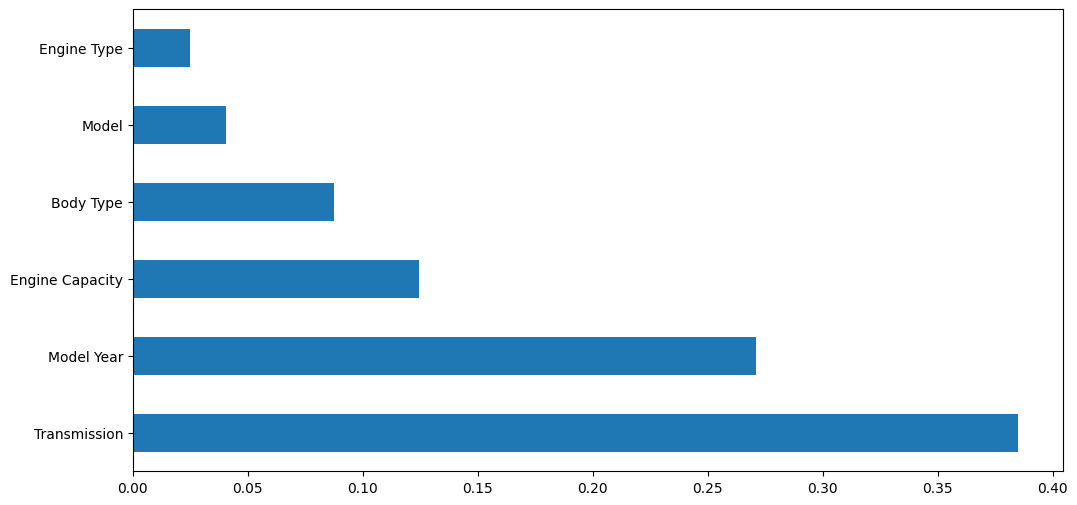

In [ ]:
# Plotting graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

## Splitting Data into Training and Testing Data

In [ ]:
# Making separate Label

X = label_encoded_data.drop('Price',axis=1)
y = label_encoded_data['Price']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=36)

## Training Regression Models

### Linear regression model

In [ ]:
# Model Building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8820774292280109
RMSE : 0.26756320794060173


In [ ]:
# Finally, manually checking these predictions
# To obtain the actual prices, I have to take the exponential of the log_price
# Since log of prices was taken in the data preprocessing step
# Then comparing these results with the actual prices

# Creating a data frame with the predicted values and the test values
df_ev = pd.DataFrame(np.exp(y_pred_lr), columns=['Predicted Price'])    # Adding the predicted price in the data frame

# Including the Actual price column in that data frame (So I can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)          # Adding the original price in the dataframe

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']              # The difference between actual and the predicted price
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
#df_ev.sort_values(by=['Difference%'],inplace = True)

df_ev.head(5)

,Predicted Price,Actual Price,Residual,Difference%
0,6812291.23,7100000.00,287708.77,4.05
1,31701987.79,31000000.00,-701987.79,2.26
2,2150083.27,2250000.00,99916.73,4.44
3,7260091.87,7600000.00,339908.13,4.47
4,3632804.35,3250000.00,-382804.35,11.78


### Random Forest Regression Model

In [ ]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)


R_squared : 0.9714738407675565
RMSE : 0.1315980869912844


In [ ]:
rf.estimators

In [ ]:
depth_of_tree = rf.estimators_[0].tree_.max_depth
print("Depth of one decision tree in the RandomForestRegressor:", depth_of_tree)

Depth of one decision tree in the RandomForestRegressor: 35


In [ ]:
print("n_estimators:", rf.n_estimators)
print("min_samples_split:", rf.min_samples_split)
print("min_samples_leaf:", rf.min_samples_leaf)

n_estimators: 100
min_samples_split: 2
min_samples_leaf: 1


In [ ]:
# Finally, manually checking these predictions
# To obtain the actual prices, I have to take the exponential of the log_price
# Since log of prices was taken in the data preprocessing step
# Then comparing these results with the actual prices

# Creating a data frame with the predicted values and the test values
df_ev = pd.DataFrame(np.exp(y_pred_rf), columns=['Predicted Price'])    # Adding the predicted price in the data frame

# Including the Actual price column in that data frame (So I can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)          # Adding the original price in the dataframe

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']              # The difference between actual and the predicted price
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'],inplace = True)

df_ev.head(5)

,Predicted Price,Actual Price,Residual,Difference%
7328,1050000.44,1050000.00,-0.44,0.00
4848,1249993.99,1250000.00,6.01,0.00
3651,2650075.60,2650000.00,-75.60,0.00
7104,4050122.52,4050000.00,-122.52,0.00
5462,4830165.06,4830000.00,-165.06,0.00


### Gradient Boosting Regressor

In [ ]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9495135632067624
RMSE : 0.17507143246011642


In [ ]:
# Finally, manually checking these predictions
# To obtain the actual prices, I have to take the exponential of the log_price
# Since log of prices was taken in the data preprocessing step
# Then comparing these results with the actual prices

# Creating a data frame with the predicted values and the test values
df_ev = pd.DataFrame(np.exp(y_pred_gbt), columns=['Predicted Price'])    # Adding the predicted price in the data frame

# Including the Actual price column in that data frame (So I can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)          # Adding the original price in the dataframe

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']              # The difference between actual and the predicted price
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'],inplace = True)

df_ev.head(5)

,Predicted Price,Actual Price,Residual,Difference%
9115,2599993.16,2600000.00,6.84,0.00
5918,2595018.03,2595000.00,-18.03,0.00
2202,6000404.73,6000000.00,-404.73,0.01
4178,1289892.71,1290000.00,107.29,0.01
1148,5350454.07,5350000.00,-454.07,0.01


In [ ]:
# Exporting Random Forest Regression as it has lowest root mean squared error

joblib.dump(rf, 'trained_model.joblib')

['trained_model.joblib']